# Write the python codes to perform dimensionality reduction on at least 4 datasets using at least 6 techniques. Build the models with at least 4 train_test_split copmbinations and diofferent set of hyperparameter values. Analyse the performance for the different DR techniques.

In [37]:
import pandas as pd
import numpy as np

In [38]:
from sklearn import datasets  
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA  
import seaborn as sns  

In [39]:
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


<AxesSubplot:>

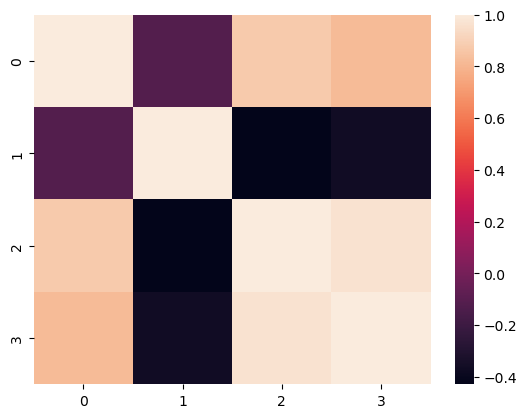

In [41]:
sns.heatmap(scaled_data.corr())

In [42]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


<AxesSubplot:>

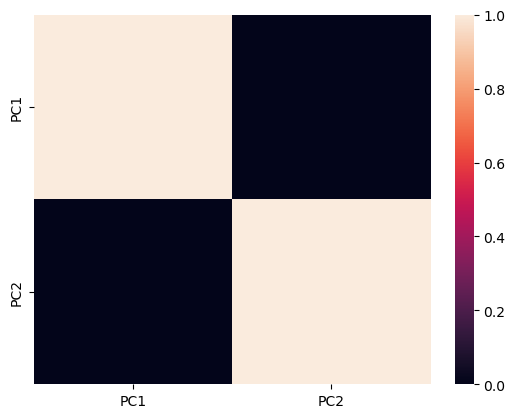

In [43]:
sns.heatmap(data_pca.corr())

In [44]:
data_pca

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

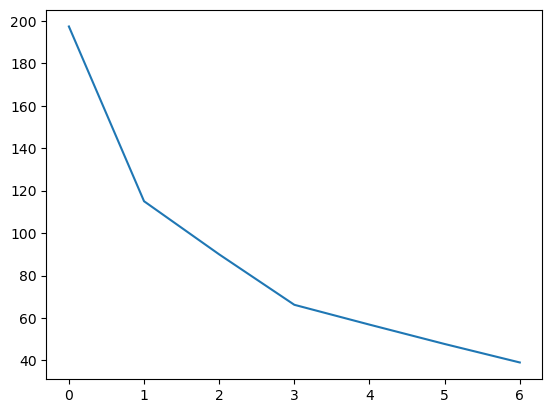

In [46]:
import matplotlib.pyplot as plt
ssd = []
sil_score = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_pca)
    cluster_labels = kmeans.fit_predict(data_pca)
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    sil_score.append(silhouette_avg)
    kmeans.fit(data_pca)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [47]:
print(sil_score)

[0.6145202036230449, 0.5091683341538228, 0.44518709742154217, 0.4143377562653907, 0.41458546512732447, 0.43545631614327, 0.44329487829380376]


In [48]:
kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(data_pca)

KMeans(max_iter=100, n_clusters=2)

In [49]:
clus_labels = pd.DataFrame(kmeans.labels_, columns = ['Cluster Labels'])

In [70]:
y_hc1 = np.array(clus_labels.T)
y_hc1 = y_hc1.flatten()
y_hc1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
result = pd.concat([pd.DataFrame(data_pca),clus_labels], axis=1)

In [72]:
result

,PC1,PC2,Cluster Labels
0,-2.264703,0.480027,1
1,-2.080961,-0.674134,1
2,-2.364229,-0.341908,1
3,-2.299384,-0.597395,1
4,-2.389842,0.646835,1
...,...,...,...
145,1.870503,0.386966,0
146,1.564580,-0.896687,0
147,1.521170,0.269069,0
148,1.372788,1.011254,0


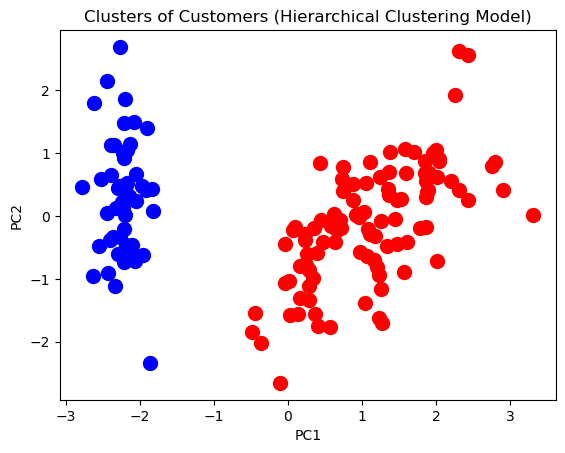

In [73]:
X_1 = data_pca.iloc[:, [0,1]].values
plt.scatter(X_1[y_hc1==0, 0], X_1[y_hc1==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_1[y_hc1==1, 0], X_1[y_hc1==1, 1], s=100, c='blue', label ='Cluster 2')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [77]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [78]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Train the model on the training set
lda.fit(X_train, y_train)

# Predict the classes of the testing set
y_pred = lda.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.83


In [80]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [87]:
tsne = TSNE(n_components=2, random_state=42)

In [88]:
X_embedded = tsne.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


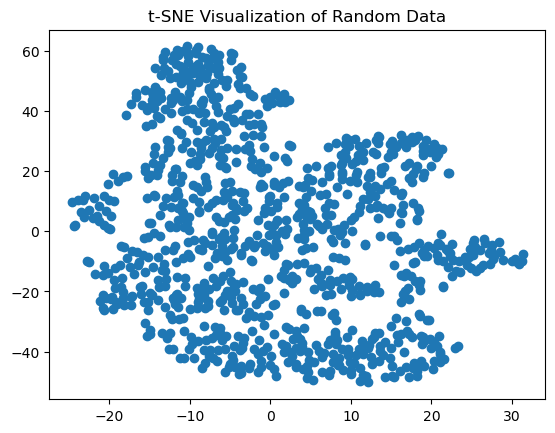

In [89]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title("t-SNE Visualization of Random Data")
plt.show()

In [90]:
# Forward Selection
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


boston = load_boston()
X, y = boston.data, boston.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


selected_features = set()


while len(selected_features) < X.shape[1]:
   
    candidate_performance = []
 
    for i in range(X.shape[1]):
        if i not in selected_features:
           
            features = list(selected_features) + [i]
            model = LinearRegression()
            model.fit(X_train[:, features], y_train)
            y_pred = model.predict(X_test[:, features])
            r2 = r2_score(y_test, y_pred)
            candidate_performance.append((i, r2))
    best_feature, best_performance = max(candidate_performance, key=lambda x: x[1])
    selected_features.add(best_feature)
    print(f"Selected features: {list(selected_features)}, R^2 score: {best_performance:.2f}")

Selected features: [12], R^2 score: 0.54
Selected features: [10, 12], R^2 score: 0.62
Selected features: [8, 10, 12], R^2 score: 0.64
Selected features: [8, 9, 10, 12], R^2 score: 0.66
Selected features: [3, 8, 9, 10, 12], R^2 score: 0.66
Selected features: [3, 4, 8, 9, 10, 12], R^2 score: 0.66
Selected features: [3, 4, 7, 8, 9, 10, 12], R^2 score: 0.68
Selected features: [1, 3, 4, 7, 8, 9, 10, 12], R^2 score: 0.71
Selected features: [1, 3, 4, 6, 7, 8, 9, 10, 12], R^2 score: 0.72
Selected features: [1, 2, 3, 4, 6, 7, 8, 9, 10, 12], R^2 score: 0.72
Selected features: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12], R^2 score: 0.71
Selected features: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12], R^2 score: 0.70
Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], R^2 score: 0.67


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [91]:
# Backward Selection 
selected_features = set(range(X.shape[1]))

# Loop until only one feature is left
while len(selected_features) > 1:
    # Initialize a list to store the performance of each candidate feature
    candidate_performance = []
    # Loop over all selected features
    for i in selected_features:
        # Select all features except the i-th feature
        features = list(selected_features - {i})
        # Fit a linear regression model on the training data
        model = LinearRegression()
        model.fit(X_train[:, features], y_train)
        # Evaluate the performance on the testing data
        y_pred = model.predict(X_test[:, features])
        r2 = r2_score(y_test, y_pred)
        # Store the performance of the candidate feature
        candidate_performance.append((i, r2))
    # Select the feature that gives the worst performance on the testing data
    worst_feature, worst_performance = min(candidate_performance, key=lambda x: x[1])
    # Remove the worst feature from the set of selected features
    selected_features -= {worst_feature}
    # Print the selected features and their performance on the testing data
    print(f"Selected features: {list(selected_features)}, R^2 score: {worst_performance:.2f}")

Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], R^2 score: 0.59
Selected features: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11], R^2 score: 0.54
Selected features: [0, 1, 2, 3, 4, 6, 8, 9, 10, 11], R^2 score: 0.44
Selected features: [0, 1, 2, 3, 4, 6, 9, 10, 11], R^2 score: 0.36
Selected features: [0, 1, 2, 3, 4, 6, 9, 11], R^2 score: 0.34
Selected features: [0, 2, 3, 4, 6, 9, 11], R^2 score: 0.29
Selected features: [0, 3, 4, 6, 9, 11], R^2 score: 0.26
Selected features: [0, 3, 4, 9, 11], R^2 score: 0.23
Selected features: [0, 3, 4, 11], R^2 score: 0.21
Selected features: [0, 3, 11], R^2 score: 0.15
Selected features: [3, 11], R^2 score: 0.07
Selected features: [3], R^2 score: -0.02
